# FASE 2: VISUALIZACIÓN

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('files/datos_totales_clean.csv')

In [3]:
df.sample(5)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
74505,432200,Canada,Ontario,Toronto,P2T 6G3,Female,Bachelor,76856.0,Single,Aurora,10477.78,Standard,2013,12,0,0,2017,10,0,0,0,0,0.0,0,0,si,bajo
281048,832810,Canada,Nova Scotia,Halifax,B3J 9S2,Male,Bachelor,63575.0,Married,Star,2721.59,Standard,2018,12,0,0,2017,9,0,0,0,0,0.0,0,0,si,bajo
14397,290249,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,75400.0,Single,Star,4815.85,Standard,2014,9,0,0,2018,10,12,4,16,2864,286.0,0,0,si,bajo
57810,436235,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,54961.0,Married,Aurora,8083.92,Standard,2015,11,0,0,2018,7,0,0,0,0,0.0,0,0,si,bajo
47583,213177,Canada,Ontario,Toronto,P1J 8T7,Female,College,NaN,Single,Aurora,7247.31,Standard,2012,8,0,0,2018,4,0,0,0,0,0.0,0,0,si,NaN


### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [4]:
#flights_booked vs year & month
df['year'].unique()

array([2017, 2018])

In [11]:
df_2017 = df[(df['year'] == 2017) & (df['flights_booked'] != 0)]

In [36]:
df_2017_vuelos_por_mes = df_2017.groupby('month')['flights_booked'].sum().reset_index() #sumamos los vuelos, no contamos las filas

In [13]:
df_2018 = df[(df['year'] == 2018) & (df['flights_booked'] != 0)]

In [35]:
df_2018_vuelos_por_mes = df_2018.groupby('month')['flights_booked'].sum().reset_index()

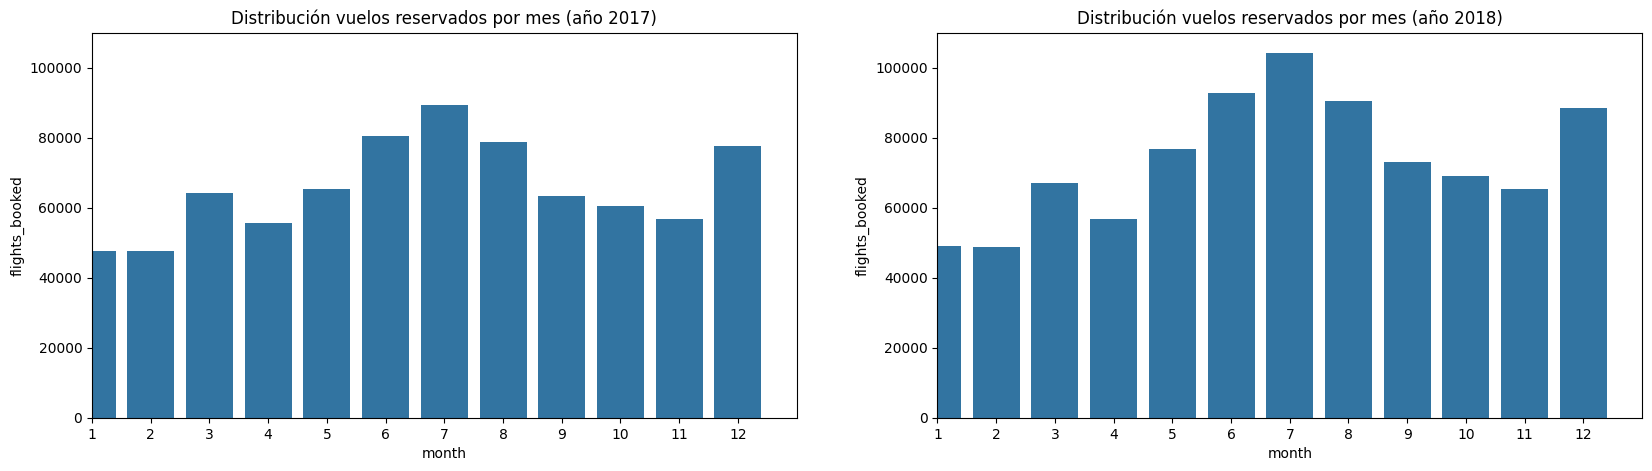

In [ ]:
# Como solo hay dos años, vamos a hacer un subplot con dos gráficas, una para cada año:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

#Utilizamos Barplot porque tenemos una variable numérica(vuelos reservados) y variable categórica(mes)

#Gráfico 1:
sns.barplot(x = 'month', y = 'flights_booked', data = df_2017_vuelos_por_mes, ax = axes[0])
axes[0].set_title("Distribución vuelos reservados por mes (año 2017)")

#Gráfico 2:
sns.barplot(x = 'month', y = 'flights_booked', data = df_2018_vuelos_por_mes, ax = axes[1])
axes[1].set_title("Distribución vuelos reservados por mes (año 2018)")

#ponemos la misma escala en los ejes:

#eje x, para asegurarnos que coge bien el mes núm 12:
axes[0].set_xlim(0,12) 
axes[1].set_xlim(0,12)

#eje y, hasta 110.000:
axes[0].set_ylim(0,110000) 
axes[1].set_ylim(0,110000);

`Conclusiones 2017 vs 2018`:
- Aunque la tendencia parece similar, durante el año 2017 se reservaron menos vuelos que en 2018. 
- Los meses con más reservas: época de verano (junio, julio, agosto) y el mes de diciembre. El primer trimestre tiene menos reservas.

### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

In [ ]:
df.sample(1) #distance vs points_accumulated

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
346651,499518,Canada,Ontario,Ottawa,K1F 2R2,Male,Doctor,124635.0,Married,Star,7123.69,Standard,2016,8,0,0,2018,8,6,6,12,4068,406.0,0,0,si,medio-bajo


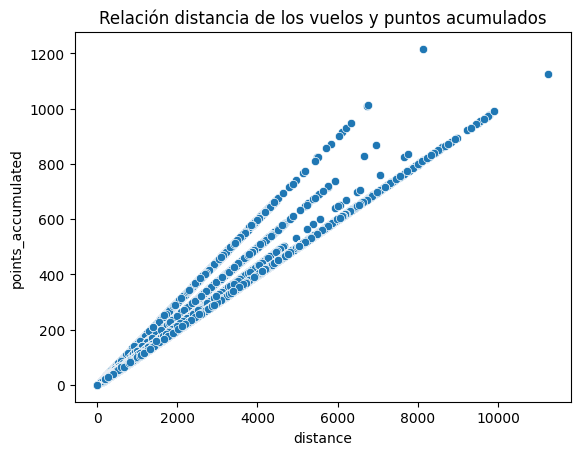

In [50]:
sns.scatterplot(data=df, x="distance", y="points_accumulated")
plt.title("Relación distancia de los vuelos y puntos acumulados");

`Conclusiones:` Hay una clara relación directa entre ambas variables. A mayor distancia recorrida en los vuelos, más puntos se acumulan.

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [ ]:
df.sample(1) #province, count clientes

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,still_client_loyalty,salary_range
347716,565171,Canada,Quebec,Tremblant,H5Y 2S9,Male,Bachelor,55921.0,Married,Star,7240.66,Standard,2014,8,0,0,2017,5,0,0,0,0,0.0,0,0,si,bajo


In [65]:
df_provincia = df[['loyalty_number', 'province']]
df_provincia.shape

(401688, 2)

In [66]:
df_provincia.duplicated().sum() #este df tiene duplicados, vamos a eliminarlos

np.int64(384951)

In [67]:
#se nos queda un df con 16737 (mismas filas que el csv inicial de clientes!)
df_provincia = df_provincia.drop_duplicates() 

In [69]:
df_analisis_provincia = df_provincia.groupby('province')['loyalty_number'].count().reset_index()

In [71]:
df_analisis_provincia.head(1)

,province,loyalty_number
0,Alberta,969


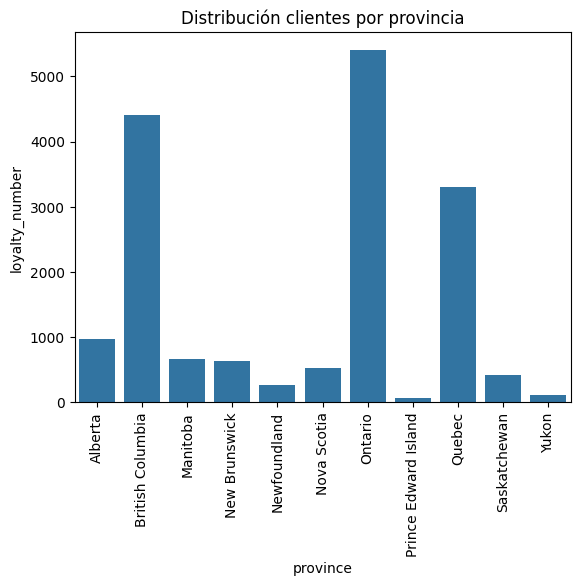

In [78]:
#barplot porque tenemos una variable numérica y variable categórica
sns.barplot(x = 'province', y = 'loyalty_number', data = df_analisis_provincia)
plt.title("Distribución clientes por provincia")

# giramos las etiquetas del eje "x",  
plt.xticks(rotation = 90);

`Conclusiones`:
- Podium de estados con más clientes: (1) Ontario es el estado que más clientes tiene, (2) British Columbia, (3) Quebec.
- Estados con menos clientes: (1) Prince Edward Island, seguido de cerca de (2) Yulkon.

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

`Conclusiones:`

### 5. ¿Cuál es la proporciñon de clientes con diferentes tipos de tarjetas de fidelidad?

`Conclusiones:`

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

`Conclusiones:`